# INTRODUCTION

- The data for this part of the notebook was gathered through Understat API by web scraping. They were gathered, seperated into different managers in an Excel Sheet and later used here for the analysis.

- The managers in this notebook are between 2014/15 season till the recent 2020/21 season.

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mplsoccer import VerticalPitch, Pitch #library used for football visualizations
from mplsoccer.utils import FontManager
from highlight_text import htext, fig_text, HighlightText

# LUIS ENRIQUE

In [3]:
messi_enrique_shots = pd.read_csv('./Data/messi_enrique.csv')
messi_enrique_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,32522,22,MissedShots,0.786,0.520,0.038670,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,Rafinha,Pass
1,32525,41,Goal,0.862,0.615,0.068702,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,Sergio Busquets,BallRecovery
2,32529,62,Goal,0.860,0.435,0.150343,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,NaN,TakeOn
3,32769,3,SavedShot,0.818,0.380,0.045503,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,31-08-2014 18:00,Pedro,Pass
4,32787,71,BlockedShot,0.885,0.602,0.114679,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,31-08-2014 18:00,Rafinha,Pass


In [4]:
#Since Understat uses Opta data, the pitch coordinates are (100,50) and hence the conversion.
def convert(df):
    df['X'] = df['X']*100
    df['Y'] = df['Y']*100

In [5]:
convert(messi_enrique_shots)

In [6]:
messi_enrique_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,32522,22,MissedShots,78.599998,52.000000,0.038670,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,Rafinha,Pass
1,32525,41,Goal,86.199997,61.500000,0.068702,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,Sergio Busquets,BallRecovery
2,32529,62,Goal,86.000000,43.500000,0.150343,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,NaN,TakeOn
3,32769,3,SavedShot,81.800003,38.000000,0.045503,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,31-08-2014 18:00,Pedro,Pass
4,32787,71,BlockedShot,88.500000,60.200001,0.114679,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,31-08-2014 18:00,Rafinha,Pass


In [7]:
#Filtering for goals to be a seperate dataframe and is done for every manager
messi_enrique_goals = messi_enrique_shots[messi_enrique_shots['result']=='Goal']
messi_enrique_goals.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
1,32525,41,Goal,86.199997,61.500000,0.068702,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,Sergio Busquets,BallRecovery
2,32529,62,Goal,86.000000,43.500000,0.150343,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,24-08-2014 20:00,NaN,TakeOn
11,33714,76,Goal,86.000000,48.700001,0.468037,Lionel Messi,a,2097,OpenPlay,2014,RightFoot,5804,Levante,Barcelona,0,5,21-09-2014 20:00,NaN,None
13,35699,61,Goal,95.300003,53.799999,0.571601,Lionel Messi,h,2097,OpenPlay,2014,Head,5818,Barcelona,Granada,6,0,27-09-2014 17:00,Dani Alves,Cross
15,35705,81,Goal,90.300003,45.400001,0.460050,Lionel Messi,h,2097,OpenPlay,2014,RightFoot,5818,Barcelona,Granada,6,0,27-09-2014 17:00,NaN,BallRecovery


In [8]:
#Calculating the total Expected Goals(xG) and Goals scored. This too is done for every manager.
total_xg_shots_one = np.round(messi_enrique_shots['xG'].sum(), 2)
total_goals_one = len(messi_enrique_goals)

total_xg_shots_one, total_goals_one

(64.82, 78)

In [9]:
# Using Eucledian distance to calculate the average distance of goals.
avg_x = messi_enrique_goals['X'].mean()
avg_y = messi_enrique_goals['Y'].mean()
avg_distance_from_goal_one = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_from_goal_one = np.round(avg_distance_from_goal_one, 2)
avg_distance_from_goal_one

10.96

In [10]:
# Using Eucledian distance to calculate the average distance of shots
avg_x = messi_enrique_shots['X'].mean()
avg_y = messi_enrique_shots['Y'].mean()
avg_distance_shot_one = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_shot_one = np.round(avg_distance_shot_one, 2)
avg_distance_shot_one

12.62

# ERNESTO VALVERDE

In [11]:
messi_valverde_shots = pd.read_csv('./Data/messi_valverde.csv')
messi_valverde_shots.head()

,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,3,MissedShots,0.781,0.388,0.045629,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,NaN,TakeOn
1,17,BlockedShot,0.758,0.454,0.024987,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,N�lson Semedo,Pass
2,24,MissedShots,0.842,0.487,0.089074,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,Sergio Busquets,Pass
3,59,BlockedShot,0.781,0.546,0.051456,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,Sergio Busquets,Pass
4,80,ShotOnPost,0.799,0.705,0.043200,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,Sergi Roberto,LayOff


In [12]:
convert(messi_valverde_shots)

In [13]:
messi_valverde_shots.head()

,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,3,MissedShots,78.099998,38.799999,0.045629,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,NaN,TakeOn
1,17,BlockedShot,75.800003,45.400001,0.024987,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,N�lson Semedo,Pass
2,24,MissedShots,84.199997,48.700001,0.089074,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,Sergio Busquets,Pass
3,59,BlockedShot,78.099998,54.599999,0.051456,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,Sergio Busquets,Pass
4,80,ShotOnPost,79.900002,70.500000,0.043200,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7885,Barcelona,Real Betis,2,0,20-08-2017 19:15,Sergi Roberto,LayOff


In [14]:
messi_valverde_goals = messi_valverde_shots[messi_valverde_shots['result']=='Goal']
messi_valverde_goals.head()

,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
8,54,Goal,90.000000,61.799999,0.100550,Lionel Messi,a,2097,OpenPlay,2017,LeftFoot,7891,Alaves,Barcelona,0,2,26-08-2017 17:15,Jordi Alba,Pass
9,65,Goal,89.000000,56.000000,0.426368,Lionel Messi,a,2097,OpenPlay,2017,LeftFoot,7891,Alaves,Barcelona,0,2,26-08-2017 17:15,Paco Alc�cer,Interception
12,25,Goal,90.500000,50.299999,0.475533,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7903,Barcelona,Espanyol,5,0,09-09-2017 19:45,Ivan Rakitic,TakeOn
14,34,Goal,96.300003,54.799999,0.641872,Lionel Messi,h,2097,OpenPlay,2017,RightFoot,7903,Barcelona,Espanyol,5,0,09-09-2017 19:45,Jordi Alba,Pass
16,66,Goal,91.199997,56.099999,0.522943,Lionel Messi,h,2097,OpenPlay,2017,LeftFoot,7903,Barcelona,Espanyol,5,0,09-09-2017 19:45,Jordi Alba,Pass


In [15]:
total_xg_shots_two = np.round(messi_valverde_shots['xG'].sum(), 2)
total_goals_two = len(messi_valverde_goals)

total_xg_shots_two, total_goals_two

(45.24, 59)

In [16]:
avg_x = messi_valverde_goals['X'].mean()
avg_y = messi_valverde_goals['Y'].mean()
avg_distance_from_goal_two = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_from_goal_two = np.round(avg_distance_from_goal_two, 2)
avg_distance_from_goal_two

11.84

In [17]:
avg_x = messi_valverde_shots['X'].mean()
avg_y = messi_valverde_shots['Y'].mean()
avg_distance_shot_two = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_shot_two = np.round(avg_distance_shot_two, 2)
avg_distance_shot_two

14.11

# QUIQUE SETIEN

In [18]:
messi_setien_shots = pd.read_csv('./Data/messi_setien.csv')
messi_setien_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,355413,17,BlockedShot,0.875,0.631,0.071353,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Arturo Vidal,Pass
1,355418,44,MissedShots,0.866,0.583,0.094836,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Jordi Alba,Pass
2,355420,49,MissedShots,0.741,0.431,0.019624,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Anssumane Fati,Pass
3,355426,75,Goal,0.865,0.511,0.393866,Lionel Messi,h,2097,OpenPlay,2019,RightFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Arturo Vidal,Pass
4,355427,78,SavedShot,0.784,0.542,0.049059,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Sergio Busquets,Pass


In [19]:
convert(messi_setien_shots)

In [20]:
messi_setien_shots.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,355413,17,BlockedShot,87.500000,63.099998,0.071353,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Arturo Vidal,Pass
1,355418,44,MissedShots,86.599998,58.299999,0.094836,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Jordi Alba,Pass
2,355420,49,MissedShots,74.099998,43.099998,0.019624,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Anssumane Fati,Pass
3,355426,75,Goal,86.500000,51.099998,0.393866,Lionel Messi,h,2097,OpenPlay,2019,RightFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Arturo Vidal,Pass
4,355427,78,SavedShot,78.400002,54.200001,0.049059,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Sergio Busquets,Pass


In [21]:
messi_setien_goals = messi_setien_shots[messi_setien_shots['result'] == 'Goal']
messi_setien_goals

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
3,355426,75,Goal,86.500000,51.099998,0.393866,Lionel Messi,h,2097,OpenPlay,2019,RightFoot,12214,Barcelona,Granada,1,0,19-01-2020 20:00,Arturo Vidal,Pass
31,359885,13,Goal,87.500000,54.599999,0.397850,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12265,Barcelona,Eibar,5,0,22-02-2020 15:00,Ivan Rakitic,TakeOn
32,359891,36,Goal,91.699997,65.500000,0.339960,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12265,Barcelona,Eibar,5,0,22-02-2020 15:00,Arturo Vidal,Pass
33,359892,39,Goal,91.000000,46.799999,0.453053,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12265,Barcelona,Eibar,5,0,22-02-2020 15:00,NaN,Dispossessed
34,359905,86,Goal,96.300003,54.400001,0.627507,Lionel Messi,h,2097,OpenPlay,2019,LeftFoot,12265,Barcelona,Eibar,5,0,22-02-2020 15:00,NaN,None
44,364361,92,Goal,86.699997,54.799999,0.117048,Lionel Messi,a,2097,OpenPlay,2019,RightFoot,12297,Mallorca,Barcelona,0,4,13-06-2020 20:00,Luis Su�rez,Pass
71,372495,33,Goal,94.300003,55.500000,0.839626,Lionel Messi,a,2097,OpenPlay,2019,LeftFoot,12393,Alaves,Barcelona,0,5,19-07-2020 19:00,Riqui Puig,TakeOn
72,372501,74,Goal,89.199997,51.799999,0.124948,Lionel Messi,a,2097,OpenPlay,2019,LeftFoot,12393,Alaves,Barcelona,0,5,19-07-2020 19:00,Jordi Alba,Cross


In [22]:
total_xg_shots_three = np.round(messi_setien_shots['xG'].sum(), 2)
total_goals_three = len(messi_setien_goals)

total_xg_shots_three, total_goals_three

(9.88, 8)

In [23]:
avg_x = messi_setien_goals['X'].mean()
avg_y = messi_setien_goals['Y'].mean()
avg_distance_from_goal_three = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_from_goal_three = np.round(avg_distance_from_goal_three, 2)
avg_distance_from_goal_three

10.52

In [24]:
avg_x = messi_setien_shots['X'].mean()
avg_y = messi_setien_shots['Y'].mean()
avg_distance_shot_three = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_shot_three = np.round(avg_distance_shot_three, 2)
avg_distance_shot_three

14.8

# RONALD KOEMAN

In [25]:
messi_koeman_shots = pd.read_csv('./Data/messi_koeman.csv')
messi_koeman_shots.head()

,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,25,BlockedShot,0.961,0.572,0.596103,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Anssumane Fati,Pass
1,48,SavedShot,0.894,0.585,0.136127,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Anssumane Fati,Throughball
2,65,SavedShot,0.874,0.259,0.051176,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Frenkie de Jong,Pass
3,71,MissedShots,0.912,0.493,0.409952,Lionel Messi,h,2097,OpenPlay,2020,Head,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Jordi Alba,Cross
4,85,SavedShot,0.858,0.456,0.086302,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,NaN,Rebound


In [26]:
convert(messi_koeman_shots)

In [27]:
messi_koeman_shots.head()

,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,25,BlockedShot,96.099998,57.200001,0.596103,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Anssumane Fati,Pass
1,48,SavedShot,89.400002,58.500000,0.136127,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Anssumane Fati,Throughball
2,65,SavedShot,87.400002,25.900000,0.051176,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Frenkie de Jong,Pass
3,71,MissedShots,91.199997,49.299999,0.409952,Lionel Messi,h,2097,OpenPlay,2020,Head,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,Jordi Alba,Cross
4,85,SavedShot,85.800003,45.599998,0.086302,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,27-09-2020 19:00,NaN,Rebound


In [28]:
messi_koeman_goals = messi_koeman_shots[messi_koeman_shots['result']=='Goal']
messi_koeman_goals.head()

,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
19,81,Goal,93.199997,36.900002,0.381432,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14856,Barcelona,Real Betis,5,2,07-11-2020 15:15,Sergi Roberto,Pass
24,72,Goal,82.400002,57.299999,0.088590,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14875,Barcelona,Osasuna,4,0,29-11-2020 13:00,Trinc�o,Pass
36,75,Goal,87.900002,61.900002,0.305874,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14898,Barcelona,Levante,1,0,13-12-2020 20:00,Frenkie de Jong,Pass
55,64,Goal,90.800003,61.500000,0.335707,Lionel Messi,a,2097,OpenPlay,2020,LeftFoot,14924,Real Valladolid,Barcelona,0,3,22-12-2020 21:00,Pedri,Pass
64,37,Goal,85.300003,65.800003,0.208058,Lionel Messi,a,2097,OpenPlay,2020,LeftFoot,14947,Athletic Club,Barcelona,2,3,06-01-2021 20:00,Pedri,Pass


In [29]:
total_xg_shots_four = np.round(messi_koeman_shots['xG'].sum(), 2)
total_goals_four = len(messi_koeman_goals)

total_xg_shots_four, total_goals_four

(17.09, 21)

In [30]:
avg_x = messi_koeman_goals['X'].mean()
avg_y = messi_koeman_goals['Y'].mean()
avg_distance_from_goal_four = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_from_goal_four = np.round(avg_distance_from_goal_four, 2)
avg_distance_from_goal_four

12.81

In [31]:
avg_x = messi_koeman_shots['X'].mean()
avg_y = messi_koeman_shots['Y'].mean()
avg_distance_shot_four = np.sqrt(np.sum(np.square(np.array([100, 50])-
                                                    np.array([avg_x, avg_y]))))

avg_distance_shot_four = np.round(avg_distance_shot_four, 2)
avg_distance_shot_four

14.54

# VISUALIZATION

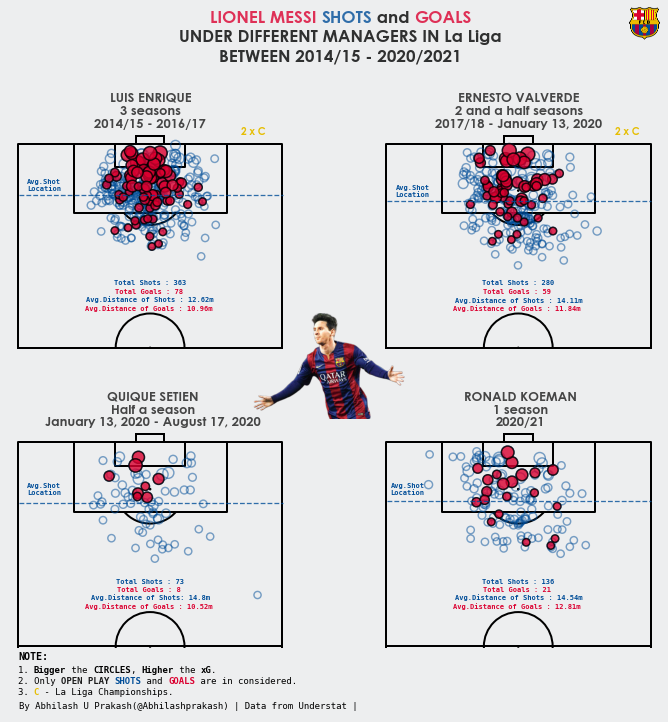

In [73]:
pitch = VerticalPitch(pitch_type = 'opta', pad_bottom=0.5,   
                      half=True, pitch_color = '#edeeef', line_color = 'black',
                      goal_type='box',
                      goal_alpha=1, figsize=(10,10))
fig, axs = pitch.grid(figheight=10, nrows=2, ncols=2, grid_width=1, title_height=0.14, space=0.16, axis=False)
fig.set_facecolor('#edeeef')





axs['pitch'][0][0].text(x=49.9, y=108, s='LUIS ENRIQUE\n3 seasons\n2014/15 - 2016/17',
              size=13,
              color='#1b1b1b',
              va='center', ha='center', fontweight = 'bold', alpha=0.8, fontfamily = 'Century Gothic')
#plot the shots
sc1 = pitch.scatter(messi_enrique_shots.X, messi_enrique_shots.Y,
                    s=(messi_enrique_shots.xG * 150) + 50,
                    edgecolors= '#004D98',
                    c= 'None',    
                    marker='o', lw = 1.45, alpha = 0.5,
                    zorder = 2, ax=axs['pitch'][0][0])
# plot the goals
sc2 = pitch.scatter(messi_enrique_goals.X, messi_enrique_goals.Y,
                     s=(messi_enrique_goals.xG * 150) + 50,
                    edgecolors='black',  
                    c='#DB0030', 
                    marker='o', lw=1.5, alpha = 0.8,
                    zorder = 2, ax=axs['pitch'][0][0])
axs['pitch'][0][0].text(x=50, y=66, s='Total Shots : {}'.format(len(messi_enrique_shots)),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][0].text(x=50.5, y=63.8, s='Total Goals : {}'.format(total_goals_one),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][0].text(x=50, y=62, s='Avg.Distance of Shots : {}m'.format(avg_distance_shot_one),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][0].text(x=50.5, y=59.8, s='Avg.Distance of Goals : {}m'.format(avg_distance_from_goal_one),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][0].text(x=11, y=103, s='2 x C',
              size=10,
              color='#E6BE03',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'Century Gothic')
axs['pitch'][0][0].axhline(y=messi_enrique_shots['X'].mean(), ls='--', lw=1.3, xmin=0.04, alpha=0.8, xmax=0.966, zorder=2,
                          color='#004D98')
axs['pitch'][0][0].text(x=90, y=90, s='Avg.Shot\nLocation',
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')




axs['pitch'][0][1].text(x=49.8, y=108, s='ERNESTO VALVERDE\n2 and a half seasons\n2017/18 - January 13, 2020',
              size=13,
              color='#1b1b1b',
              va='center', ha='center', fontweight = 'bold', alpha=0.8, fontfamily = 'Century Gothic')
#plot the shots
sc3 = pitch.scatter(messi_valverde_shots.X, messi_valverde_shots.Y,
                    s=(messi_valverde_shots.xG * 150) + 50,
                    edgecolors= '#004D98',
                    c= 'None',    
                    marker='o', lw = 1.45, alpha = 0.5,
                    zorder = 2, ax=axs['pitch'][0][1])
# plot the goals
sc4 = pitch.scatter(messi_valverde_goals.X, messi_valverde_goals.Y,
                     s=(messi_valverde_goals.xG * 150) + 50,
                    edgecolors='black',  
                    c='#DB0030', 
                    marker='o', lw=1.5, alpha = 0.8,
                    zorder = 2, ax=axs['pitch'][0][1])
axs['pitch'][0][1].text(x=50, y=66, s='Total Shots : {}'.format(len(messi_valverde_shots)),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][1].text(x=50.5, y=63.8, s='Total Goals : {}'.format(total_goals_two),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][1].text(x=50, y=61.8, s='Avg.Distance of Shots : {}m'.format(avg_distance_shot_two),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][1].text(x=50.5, y=59.8, s='Avg.Distance of Goals : {}m'.format(avg_distance_from_goal_two),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][0][1].text(x=9, y=103, s='2 x C',
              size=10,
              color='#E6BE03',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'Century Gothic')
axs['pitch'][0][1].axhline(y=messi_valverde_shots['X'].mean(), ls='--', lw=1.3, xmin=0.04, alpha=0.8, xmax=0.966, zorder=2,
                          color='#004D98')
axs['pitch'][0][1].text(x=90, y=88.5, s='Avg.Shot\nLocation',
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')





axs['pitch'][1][0].text(x=49, y=108, s='QUIQUE SETIEN\nHalf a season\nJanuary 13, 2020 - August 17, 2020',
              size=13,
              color='#1b1b1b',
              va='center', ha='center', fontweight = 'bold', alpha=0.8, fontfamily = 'Century Gothic')
#plot the shots
sc3 = pitch.scatter(messi_setien_shots.X, messi_setien_shots.Y,
                    s=(messi_setien_shots.xG * 150) + 50,
                    edgecolors= '#004D98',
                    c= 'None',    
                    marker='o', lw = 1.45, alpha = 0.5,
                    zorder = 2, ax=axs['pitch'][1][0])
# plot the goals
sc4 = pitch.scatter(messi_setien_goals.X, messi_setien_goals.Y,
                     s=(messi_setien_goals.xG * 150) + 50,
                    edgecolors='black',  
                    c='#DB0030', 
                    marker='o', lw=1.5, alpha = 0.8,
                    zorder = 2, ax=axs['pitch'][1][0])
axs['pitch'][1][0].text(x=50, y=66, s='Total Shots : {}'.format(len(messi_setien_shots)),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][0].text(x=50.5, y=64, s='Total Goals : {}'.format(total_goals_three),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][0].text(x=50, y=62, s='Avg.Distance of Shots: {}m'.format(avg_distance_shot_three),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][0].text(x=50.5, y=60, s='Avg.Distance of Goals : {}m'.format(avg_distance_from_goal_three),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][0].axhline(y=messi_setien_shots['X'].mean(), ls='--', lw=1.3, xmin=0.04, alpha=0.8, xmax=0.966, zorder=2,
                          color='#004D98')
axs['pitch'][1][0].text(x=90, y=88.5, s='Avg.Shot\nLocation',
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')





axs['pitch'][1][1].text(x=49, y=108, s='RONALD KOEMAN\n1 season\n2020/21',
              size=13,
              color='#1b1b1b',
              va='center', ha='center', fontweight = 'bold', alpha=0.8, fontfamily = 'Century Gothic')
#plot the shots
sc3 = pitch.scatter(messi_koeman_shots.X, messi_koeman_shots.Y,
                    s=(messi_koeman_shots.xG * 150) + 50,
                    edgecolors= '#004D98',
                    c= 'None',    
                    marker='o', lw = 1.45, alpha = 0.5,
                    zorder = 2, ax=axs['pitch'][1][1])
# plot the goals
sc4 = pitch.scatter(messi_koeman_goals.X, messi_koeman_goals.Y,
                     s=(messi_koeman_goals.xG * 150) + 50,
                    edgecolors='black',  
                    c='#DB0030', 
                    marker='o', lw=1.5, alpha = 0.8,
                    zorder = 2, ax=axs['pitch'][1][1])
axs['pitch'][1][1].text(x=50, y=66, s='Total Shots : {}'.format(len(messi_koeman_shots)),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][1].text(x=50.5, y=64, s='Total Goals : {}'.format(total_goals_four),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][1].text(x=50, y=62, s='Avg.Distance of Shots : {}m'.format(avg_distance_shot_four),
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][1].text(x=50.5, y=60, s='Avg.Distance of Goals : {}m'.format(avg_distance_from_goal_four),
              size=7,
              color='#DB0030',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')
axs['pitch'][1][1].axhline(y=messi_koeman_shots['X'].mean(), ls='--', lw=1.3, xmin=0.04, alpha=0.8, xmax=0.966, zorder=2,
                          color='#004D98')
axs['pitch'][1][1].text(x=91.8, y=88.5, s='Avg.Shot\nLocation',
              size=7,
              color='#004D98',
              va='center', ha='center', fontweight = 'bold', fontfamily = 'monospace')



#TITLE
fig_text(s = '<LIONEL MESSI> <SHOTS> and <GOALS>\nUNDER DIFFERENT MANAGERS IN La Liga\nBETWEEN 2014/15 - 2020/2021',
            x = 0.51, y = 0.99,
            fontsize=17,
            fontweight='bold', alpha = 0.8,
            fontfamily = 'Century Gothic',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"#DB0030", 'fontweight':'bold'}, {'color':"#004D98", 'fontweight':'bold'},
                                  {'color':"#DB0030", 'fontweight':'bold'}])

#FOOTER
fig_text(s = 'NOTE:',
            x = 0.04, y = 0.1,
            fontsize=10,
            fontweight='bold', alpha = 1,
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center')
fig_text(s = '1. <Bigger> the <CIRCLES>, <Higher> the <xG>.',
            x = 0.168, y = 0.08,
            fontsize=9,
            fontweight='medium',
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"black", 'fontweight': 'bold'},{'color':"black", 'fontweight':'bold'}, 
                                   {'color':"black", 'fontweight':'bold'}, {'color':"black", 'fontweight':'bold'}])
fig_text(s = '2. Only <OPEN PLAY> <SHOTS> and <GOALS> are in considered.',
            x = 0.23, y = 0.065,
            fontsize=9,
            fontweight='medium',
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"#1b1b1b", 'fontweight': 'bold'},{'color':"#004D98", 'fontweight':'bold'}, 
                                   {'color':"#DB0030", 'fontweight':'bold'}])
fig_text(s = '3. <C> - La Liga Championships.',
            x = 0.135, y = 0.05,
            fontsize=9,
            fontweight='medium',
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center',
            highlight_textprops = [{'color':"#E6BE03", 'fontweight': 'bold'}])
fig_text(s = 'By Abhilash U Prakash(@Abhilashprakash) | Data from Understat |',
            x = 0.277, y = 0.03,
            fontsize=9,
            fontweight='medium',
            fontfamily = 'monospace',
            color = 'black',
            ha = 'center',
            textalign = 'center')


#LOADING IMAGES
im = plt.imread('./Logos/1200px-FC_Barcelona_(crest).svg.png')
newax = fig.add_axes([0.95,0.095,0.05,0.9], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')
im = plt.imread('./Logos/10Lionel-Messi-1-removebg-preview.png')
newax = fig.add_axes([0.37,0.093,0.25,0.477], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

#SAVING THE VIZUALIZATION
plt.savefig('./Vizzes/messi_ap', dpi=500, bbox_inches='tight');